In [1]:
from keras.datasets import cifar10
import numpy as np

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
print('train:', len(x_img_train))
print('test:', len(x_img_test))

train: 50000
test: 10000


In [6]:
x_img_train.shape

(50000, 32, 32, 3)

In [7]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [9]:
y_label_train.shape

(50000, 1)

In [10]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
              5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [17]:
import matplotlib.pyplot as plt
def plot_image_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        title = str(i) + '. ' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += ' => ' + label_dict[labels[i][0]]
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

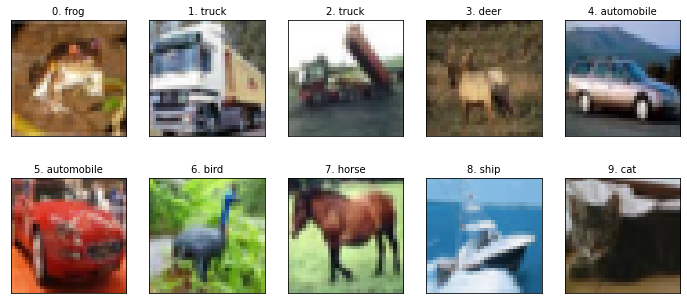

In [18]:
plot_image_labels_prediction(x_img_train, y_label_train, [], 0)

In [19]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [20]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [21]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [22]:
y_label_train.shape

(50000, 1)

In [23]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [25]:
y_label_test_OneHot.shape

(10000, 10)

In [26]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)